In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
##### Set total number of episodes to train agent on.
max_iterations_K = 1000
#####

##### γ or discount factor is a value between 0 and 1.
# Question 2.1: How does the choice of γ influence the behavior of the algorithm?
discount_factor_y = .99 



##### Step Size or learning rate α #####
# Question 2.2: Fix discount_factor_γ = 0.99(THIS IS IRRELEVANT) and ∆ = 0.05, and consider the step sizes:
# c/Sqrt(k), c/k, c/k.power(2)
# for various choices of c. Plot πθk(a2|x) as a function of episode k. this value here will impact the 
# learning rate in the Go Function.
# TRY 0.1, 1, 10, 100
c = 0.1
learning_rate_alpha = 1 #Default but this will be updated in Go function.
#####

##### ∆ ∈ {0.01, 0.05, 0.1, 0.5}.
delta = 0.05
#####

# Initialize a percentage which will dictate the actions threshold for giving a reward
# Used in the getReward function
probability_a1 = 0.5
probability_a2 = 0.5 + delta
#####

#Two actions: a1 and a2 (so that A = {a1,a2}).
actions_name = ["a1", "a2"]
num_actions = len(actions_name) #the number of actions
actions = np.arange(num_actions)

#### counts per action, ie numbber of times each action has occured.
action_counter_per_action = np.ones(num_actions)

total_action_counter = 1

#### Preferences: θ 
# Initialize preferences: REINFORCE works by increasing the preferences 
# of better actions faster than preferences of worse actions 
# this value will be used in the softmax to add a kind of a weight to the actions to help determine which action will be selected
# hese are basically the weights of actions 1 and 2

preference_theta = np.zeros(num_actions) 

#A counter for the total mean reward
total_mean_reward = 0

# Mean reward for each arm
mean_reward_per_action = np.zeros(num_actions)

#This is an array which will hold the cumulative reward for each action
#a1 reward is stored at index 0 and a2 reward at index 1, initialized at zero
reward_per_iteration = np.zeros(max_iterations_K) 

#array that stores the values of the preference for A2 at every iteration (later used to graph)
P_a2_per_iteration = np.zeros(max_iterations_K) 

opt_grad = 0





In [25]:
def softmax():
        # using sum with axis=0 because ome clever person in a blog implements like 
        # this rather than array [1,0], array([0,0]) for choice of φ, 
        
        result = np.exp(preference_theta - np.max(preference_theta)) / np.sum(np.exp(preference_theta - np.max(preference_theta)), axis=0)
        return result

In [26]:
def run():
        for t in range(max_iterations_K-1):
            go()
            reward_per_iteration[t] = total_mean_reward

# The two actions lead to 0/1 valued random rewards such that each action
# ai yields a reward of 1 with probability pi, with p1 = 1/2 and p2 = 1/2 + ∆ for some ∆ > 0. 

def getReward(_action):
    
    # Draw means from probability distribution
    randomNum = np.random.normal(0, 1)
    if(_action == 'a1'):
        if(randomNum < probability_a1):
            return 1
        else:
            return 0
    if(_action == 'a2'):
        if(randomNum < probability_a2):
            return 1
        
        else: 
            return 0
    
def go():
    
    global total_action_counter
    global total_mean_reward
    
    # Update preferences using probability distribution given by softmax function
    prob_action = softmax()
    P_a2_per_iteration[total_action_counter-1] = prob_action[1]
    
    # Select action based on current preferences 
    choosenAction = np.random.choice(actions, p=prob_action)
    
    _reward = getReward(actions_name[choosenAction])
        
    #Update counter
    total_action_counter = total_action_counter + 1
    action_counter_per_action[choosenAction] += 1
        
    # Update total
    total_mean_reward = total_mean_reward + (_reward - total_mean_reward) / total_action_counter
        
    #Update results for mean_reward_per_action
    mean_reward_per_action[choosenAction] = mean_reward_per_action[choosenAction] + (
    _reward - mean_reward_per_action[choosenAction]) / action_counter_per_action[choosenAction]
        
    # Update preferences
    # print ("total mean reward in update preferences", +  total_mean_reward)
    preference_theta[choosenAction] = preference_theta[choosenAction] + \
    learning_rate_alpha * (_reward - total_mean_reward) * (1 - prob_action[choosenAction])
    
    actions_not_taken = actions!=choosenAction
    
    preference_theta[actions_not_taken] = preference_theta[actions_not_taken] - \
    learning_rate_alpha * (_reward - total_mean_reward) * prob_action[actions_not_taken]
            

            
def reset():
    # Resets results while keeping settings
    total_action_counter = 1
    action_counter_per_action  = np.zeros(num_actions)
    reward_per_iteration = np.zeros(max_iterations_K)
    mean_reward_per_action = np.zeros(num_actions)
    preference_theta = np.zeros(num_actions)
    P_a2_per_iteration = np.zeros(max_iterations_K)
    total_mean_reward = 0
        

In [27]:
opt_grad = 0


1
t = 0
1
1
t = 1
1
1
t = 2
1
1
t = 3
1


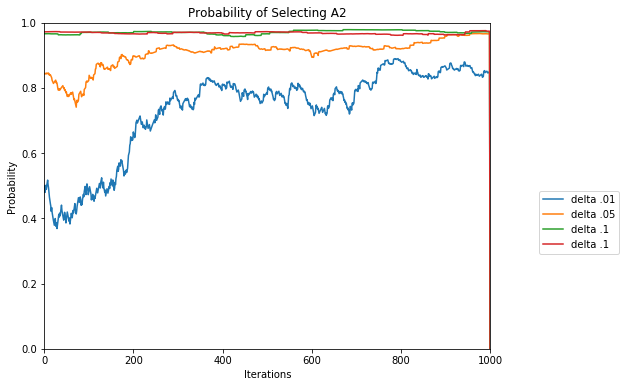

In [28]:
plt.figure(figsize=(8,6))

# Run experiments
episodes = 4
for t in range(episodes):
    # Reset counts and rewards
    reset()
    
    print(total_action_counter)
    learning_rate_alpha = .1/np.sqrt(total_action_counter)
    # Run experiments
    if(t == 0):
        delta = .01
    elif(t == 1):
        delta = .05
    elif(t == 2):
        delta = .1
    elif(t == 3):
        delta = .5
    run()
 
    if(t == 0):
        print("t = 0")
        plt.plot(P_a2_per_iteration, label="delta .01")
    elif(t == 1):
        print("t = 1")

        plt.plot(P_a2_per_iteration, label="delta .05")
    elif(t == 2):
        print("t = 2")

        plt.plot(P_a2_per_iteration, label="delta .1")
    elif(t == 3):
        print("t = 3")
        plt.plot(P_a2_per_iteration, label="delta .1")
    total_action_counter = 1    
    print(total_action_counter)

   
    
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlim([0, 1000])
plt.ylim([0, 1])
plt.xlabel("Iterations")
plt.ylabel("Probability")
plt.title("Probability of Selecting A2")
plt.show()

UsageError: Line magic function `%` not found.
